In [55]:
# %matplotlib notebook
# %matplotlib widget
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [56]:
def wave(x, t):
    k1 = 40  # 1/m
    k2 = 80  # 1/m
    k3 = 300  # 1/m
    k4 = 312  # 1/m
    f1 = 50  # Hz
    f2 = 70  # Hz
    f3 = 390  # Hz
    f4 = 456  # Hz
    assert sft > 2 * max(f1, f2, f3, f4), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the wave'
    assert sfx > 2 * max(k1, k2, k3, k4), 'Nyquist: Make sure sampling frequency > 2 * highest frequency of the wave'
    wave = np.sin(2 * np.pi * k1 * x + 2 * np.pi * f1 * t)
    wave += np.cos(2 * np.pi * k2 * x + 2 * np.pi * f2 * t)
    wave += np.sin(2 * np.pi * k3 * x + 2 * np.pi * f3 * t)
    wave += np.cos(2 * np.pi * k4 * x + 2 * np.pi * f4 * t)
    return wave

In [57]:
sp = 1024  # sampling points
t_max = .1
x_max = .1
dt = t_max / sp  # sampling interval
dx = x_max / sp  # sampling interval
sft = sp / t_max  # sampling frequency t
sfx = sp / x_max  # sampling spatial frequency x
print('sampling frequency t', sft)
print('sampling frequency x', sfx)
x = np.arange(0, x_max, dx)
T = np.arange(0, t_max, dt)
y = np.zeros((len(x), len(T)))
for i, t in enumerate(T):
    y[:, i] = wave(x, t)
print('y.shape', y.shape)

sampling frequency t 10240.0
sampling frequency x 10240.0
y.shape (1024, 1024)


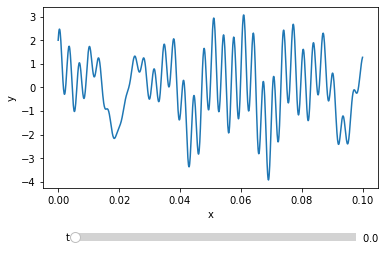

In [58]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('x')
ax.set_ylabel('y')
l, = ax.plot(x, y[:, 0])
fig.subplots_adjust(bottom=0.25)
ax_t = plt.axes([0.20, 0.05, 0.65, 0.06])
t_slider = Slider(
    ax=ax_t,
    label='t',
    valmin=0,
    valmax=t_max,
    valinit=0,
    valstep=dt,
)


def val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int(v * sp / t_max) - 1


def update_t(val):
    l.set_ydata(y[:, val_to_idx(val)])
    fig.canvas.draw_idle()


t_slider.on_changed(update_t)
plt.show()

In [59]:
fft_result = np.fft.fft2(y)
abs_fft = np.abs(fft_result)

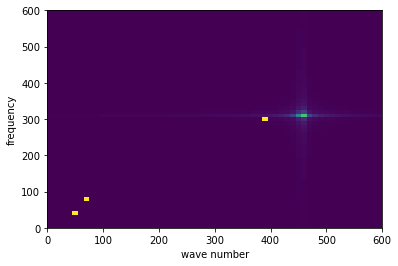

In [60]:
wave_number = np.arange(0, sfx, sfx / sp)
freq = np.arange(0, sft, sft / sp)
# T = sp / sf
# FREQ = n / T
plt.close()
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('wave number')
ax.set_ylabel('frequency')
ax.pcolormesh(wave_number, freq, abs_fft, cmap="viridis")
plt.xlim(0, sfx / 2)
plt.ylim(0, sft / 2)
plt.xlim(0, 600)
plt.ylim(0, 600)
plt.show()

In [61]:
ifft_result = np.fft.ifft2(fft_result).real

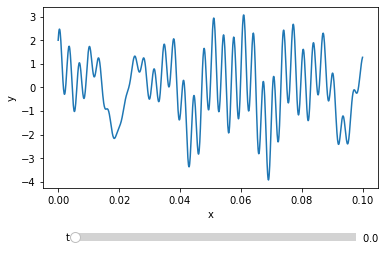

In [62]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('x')
ax.set_ylabel('y')
l, = ax.plot(x, ifft_result[:, 0])
fig.subplots_adjust(bottom=0.25)
ax_t = plt.axes([0.20, 0.05, 0.65, 0.06])
t_slider = Slider(
    ax=ax_t,
    label='t',
    valmin=0,
    valmax=t_max,
    valinit=0,
    valstep=dt,
)


def val_to_idx(v):
    """
    slide value to ndarray index
    :param v: slide value
    :rtype: int
    """
    return int(v * sp / t_max)


def update_t(val):
    l.set_ydata(y[:, val_to_idx(val)])
    fig.canvas.draw_idle()


t_slider.on_changed(update_t)
plt.show()